In [43]:
from pathlib import Path
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


def find_project_root(start: str | None = None) -> Path:
    start_path = Path(start or Path.cwd()).resolve()
    for p in [start_path, *start_path.parents]:
        if (p / "data").is_dir() and (p / "README.md").is_file():
            return p
        if (p / ".git").exists():
            return p
    return start_path


PROJECT_ROOT = find_project_root()
os.chdir(PROJECT_ROOT)
print(f"cwd set to project root: {PROJECT_ROOT}")


cwd set to project root: /Users/xiaobaodawang/Research/replicate/LLM_Firm_code


In [54]:
import pandas as pd
exp1_data_folder = './output/experiment_1'
# read all csv files in exp1_data_folder
csv_files = [f for f in os.listdir(exp1_data_folder) if f.endswith('.csv')]
summary_df = pd.DataFrame(columns=['profile_id', 'win', 'p_win_mean', 'p_win_median'])
for i, csv_file in enumerate(csv_files):
    df = pd.read_csv(os.path.join(exp1_data_folder, csv_file))
    profile_id = csv_file.replace('_fixreal5000.csv','')
    profile_id = profile_id.replace('_',' ')
    win = len(df[df['profile_id'] == profile_id])
    p_win_mean = df[df['profile_id'] == profile_id]['prob_chosen'].mean()
    p_win_median = df[df['profile_id'] == profile_id]['prob_chosen'].median()
    row_dict = {
        'profile_id': profile_id,
        'win': win,
        'p_win_mean': p_win_mean,
        'p_win_median': p_win_median
    }
    summary_df = pd.concat([summary_df, pd.DataFrame([row_dict])], ignore_index=True)
summary_df['win_rate'] = summary_df['win'] / 5000

/var/folders/mj/pp0xftrd797d13_3f8ljhh600000gn/T/ipykernel_84642/3450189685.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary_df = pd.concat([summary_df, pd.DataFrame([row_dict])], ignore_index=True)


In [55]:
design100 = pd.read_csv("./experiments/alternatives/design100.csv")
real_profiles = pd.read_csv("./experiments/alternatives/real_profiles.csv")

design100 = design100.rename(columns={"real_profile_id": "profile_id"})
real_profiles = real_profiles.rename(columns={"real_profile_id": "profile_id"})

attrs = pd.concat([design100, real_profiles], ignore_index=True)

data = summary_df.merge(attrs, on="profile_id", how="left")
missing = data[data["battery_life"].isna()]["profile_id"].tolist()
print("missing attributes:", missing)

data.head(10)


missing attributes: []


,profile_id,win,p_win_mean,p_win_median,win_rate,battery_life,screen_size,thickness,front_camera,rear_camera,focal_length,ultrawide,geekbench,ram,price
0,r28943,2471,0.935705,0.995929,0.4942,30,6.1,8.8,18,60,5,equipped,7800,4,749
1,r652346,1491,0.889586,0.970687,0.2982,18,6.3,7.7,24,60,10,not equipped,6200,12,949
2,r1002275,3736,0.935391,0.993307,0.7472,42,6.6,7.7,12,36,8,equipped,8600,16,1049
3,r23222,1981,0.922000,0.991422,0.3962,24,6.1,7.7,24,36,8,not equipped,7000,4,749
4,r264023,1856,0.925083,0.992423,0.3712,30,6.1,7.7,12,48,3,not equipped,6200,4,849
5,r663671,1403,0.887673,0.970688,0.2806,18,6.6,8.8,30,48,8,not equipped,7000,12,949
6,r155634,3658,0.941731,0.994780,0.7316,36,6.6,7.7,18,60,3,equipped,7800,12,749
7,r1357577,1158,0.871318,0.939913,0.2316,24,6.9,8.3,18,60,1,equipped,7000,8,1249
8,r790811,1156,0.874073,0.946596,0.2312,18,6.6,6.0,18,72,5,not equipped,7000,4,1049
9,r708636,1314,0.888849,0.962673,0.2628,18,6.9,8.8,18,60,8,equipped,6200,16,949


In [64]:
df_top = data.sort_values("win_rate", ascending=False).head(10)
df_top = pd.concat([df_top, data.sort_values("p_win_mean", ascending=False).head(10)])
df_top = pd.concat([df_top, data.sort_values("p_win_median", ascending=False).head(10)])
df_top = df_top.drop_duplicates()
display(df_top)

,profile_id,win,p_win_mean,p_win_median,win_rate,battery_life,screen_size,thickness,front_camera,rear_camera,focal_length,ultrawide,geekbench,ram,price
26,r248884,4854,0.977258,0.999512,0.9708,36,6.1,6.00,30,48,10,equipped,9400,16,749
19,r692659,4356,0.951121,0.996406,0.8712,36,6.9,6.00,24,36,3,equipped,9400,12,949
101,r440012,4289,0.952564,0.996827,0.8578,24,6.6,6.00,12,72,8,equipped,9400,12,849
74,r177608,3961,0.948164,0.996826,0.7922,30,6.3,6.00,12,72,8,not equipped,8600,12,749
77,r373340,3956,0.939303,0.991422,0.7912,42,6.9,8.30,24,60,3,equipped,9400,8,849
87,r572725,3952,0.951032,0.997199,0.7904,42,6.1,6.00,30,48,5,not equipped,9400,4,949
63,iPhone 17,3760,0.942650,0.995391,0.752,30,6.3,7.95,18,48,2,equipped,9191,8,799
2,r1002275,3736,0.935391,0.993307,0.7472,42,6.6,7.70,12,36,8,equipped,8600,16,1049
39,iPhone 17 Air,3721,0.938540,0.993307,0.7442,27,6.5,5.64,18,48,2,not equipped,9323,12,999
73,r1254830,3697,0.934539,0.992423,0.7394,42,6.3,7.70,18,48,1,equipped,8600,16,1149


In [65]:
df_bottom = data.sort_values("win_rate", ascending=True).head(10)
df_bottom = pd.concat([df_bottom, data.sort_values("p_win_mean", ascending=True).head(10)])
df_bottom = pd.concat([df_bottom, data.sort_values("p_win_median", ascending=True).head(10)])
df_bottom = df_bottom.drop_duplicates()
display(df_bottom)

,profile_id,win,p_win_mean,p_win_median,win_rate,battery_life,screen_size,thickness,front_camera,rear_camera,focal_length,ultrawide,geekbench,ram,price
49,r777109,647,0.859670,0.924142,0.1294,36,6.3,8.8,18,36,5,not equipped,6200,4,1049
27,r1311437,767,0.844688,0.904650,0.1534,24,6.9,8.8,12,60,10,equipped,7800,4,1249
62,r1174956,841,0.860929,0.924142,0.1682,18,6.9,8.8,24,72,5,not equipped,7000,12,1149
37,r267812,888,0.885583,0.966913,0.1776,24,6.6,8.3,30,36,10,not equipped,6200,4,849
22,r518912,1072,0.889113,0.962673,0.2144,24,6.6,7.7,24,48,1,not equipped,6200,4,949
44,r1225317,1073,0.862753,0.924142,0.2146,24,6.9,7.7,12,48,5,not equipped,6200,16,1149
89,r1092121,1142,0.882677,0.957912,0.2284,18,6.1,8.3,30,36,8,equipped,6200,8,1149
8,r790811,1156,0.874073,0.946596,0.2312,18,6.6,6.0,18,72,5,not equipped,7000,4,1049
7,r1357577,1158,0.871318,0.939913,0.2316,24,6.9,8.3,18,60,1,equipped,7000,8,1249
38,r1313559,1247,0.858048,0.924142,0.2494,36,6.9,7.7,30,36,3,not equipped,7800,4,1249


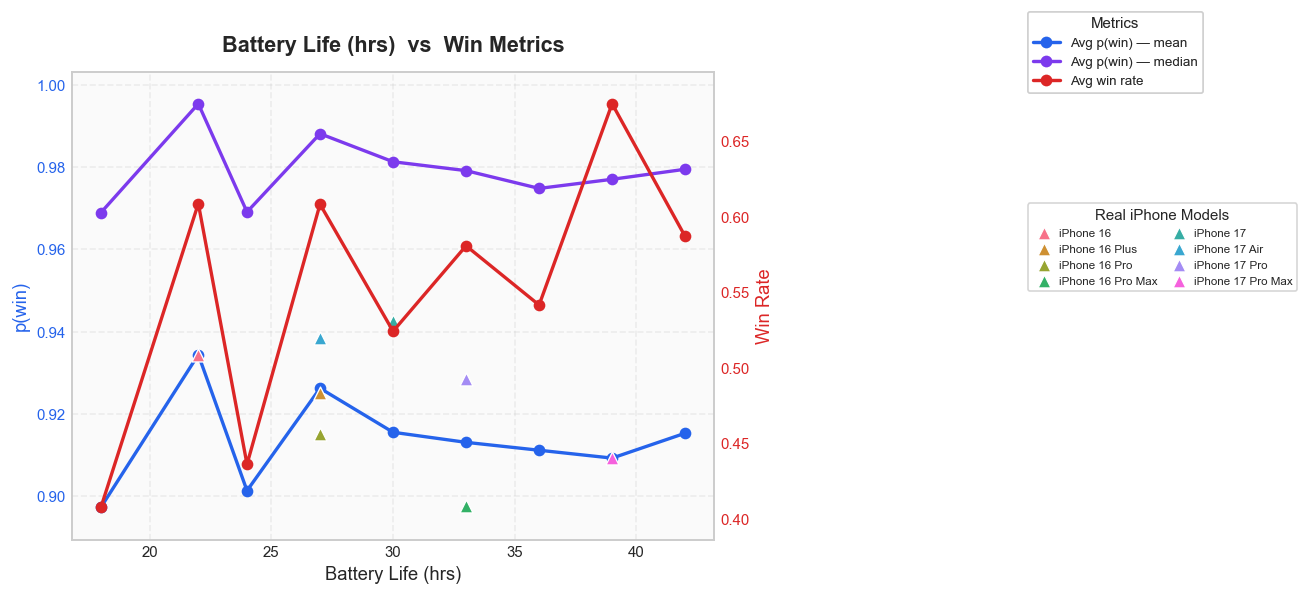

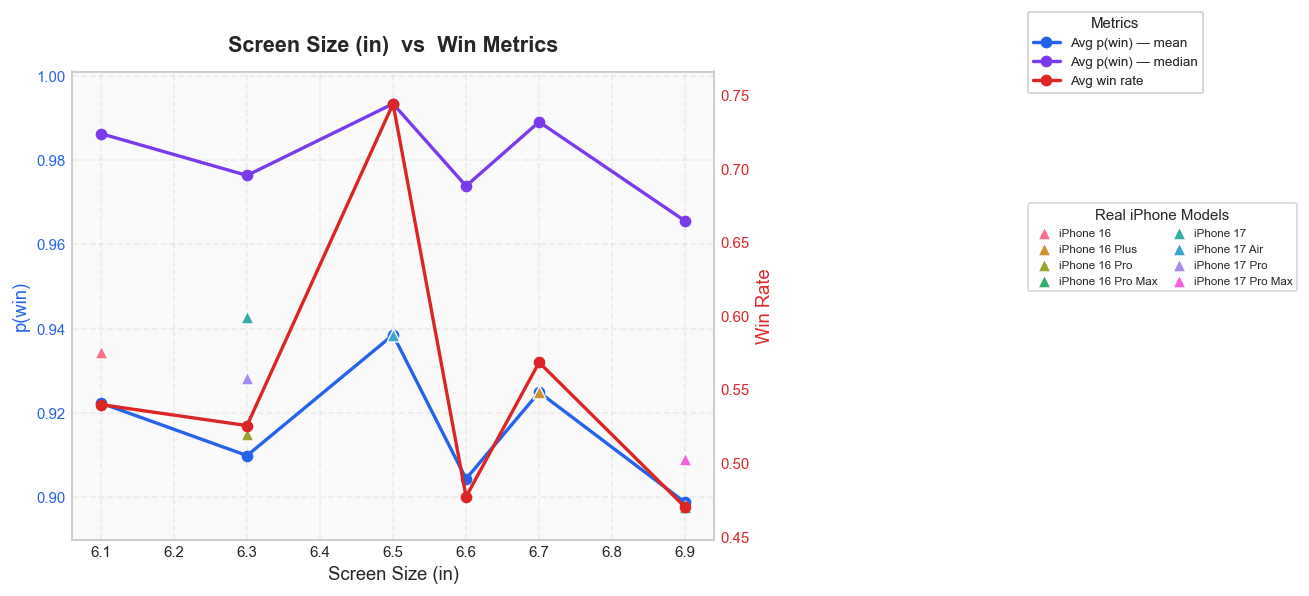

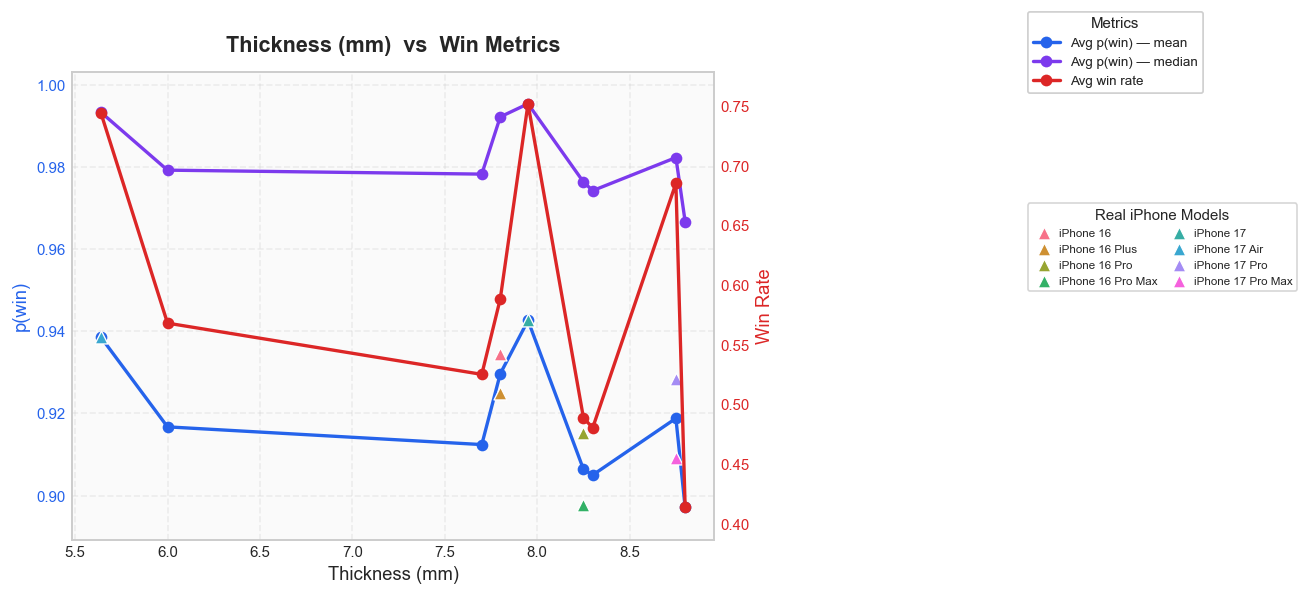

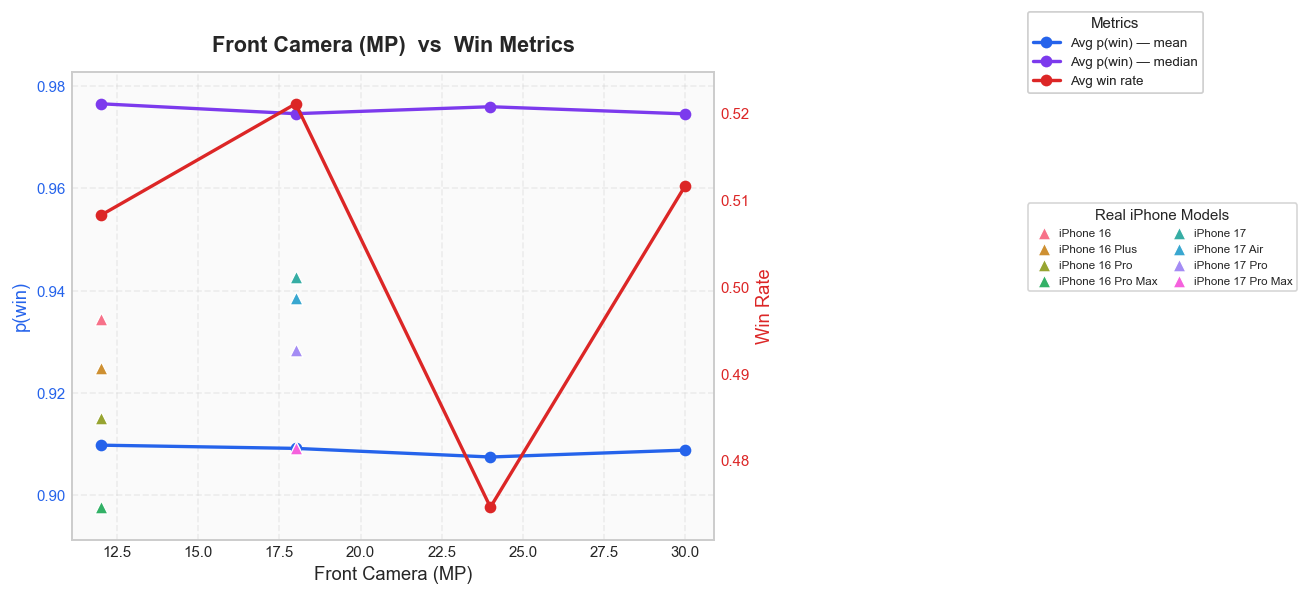

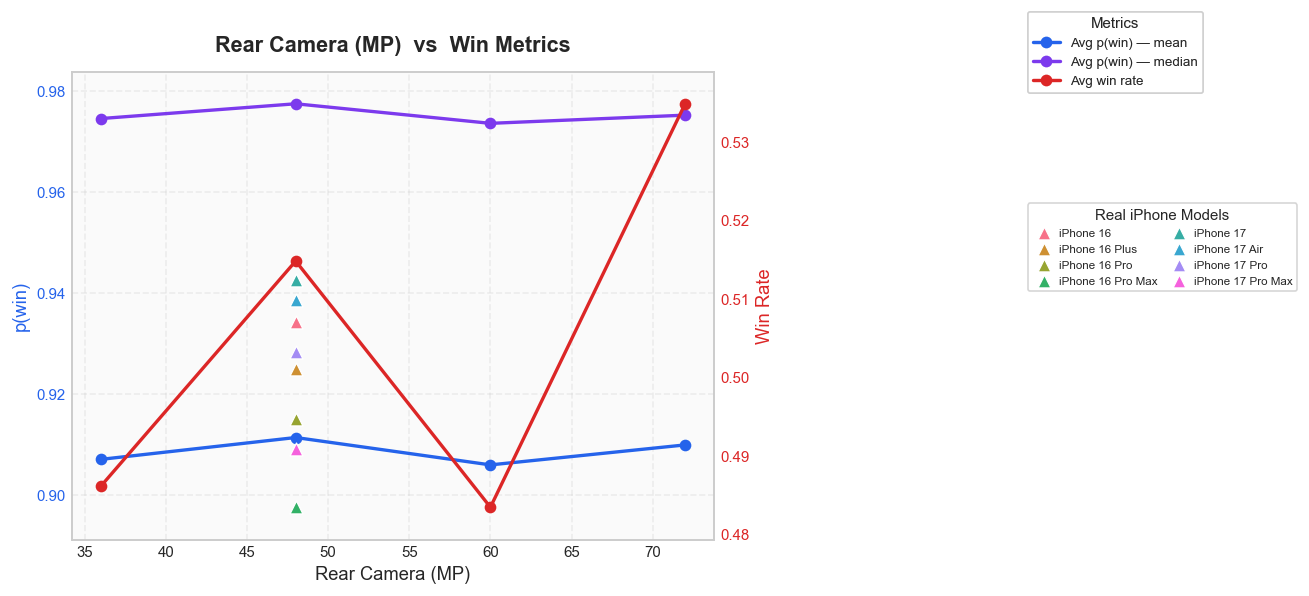

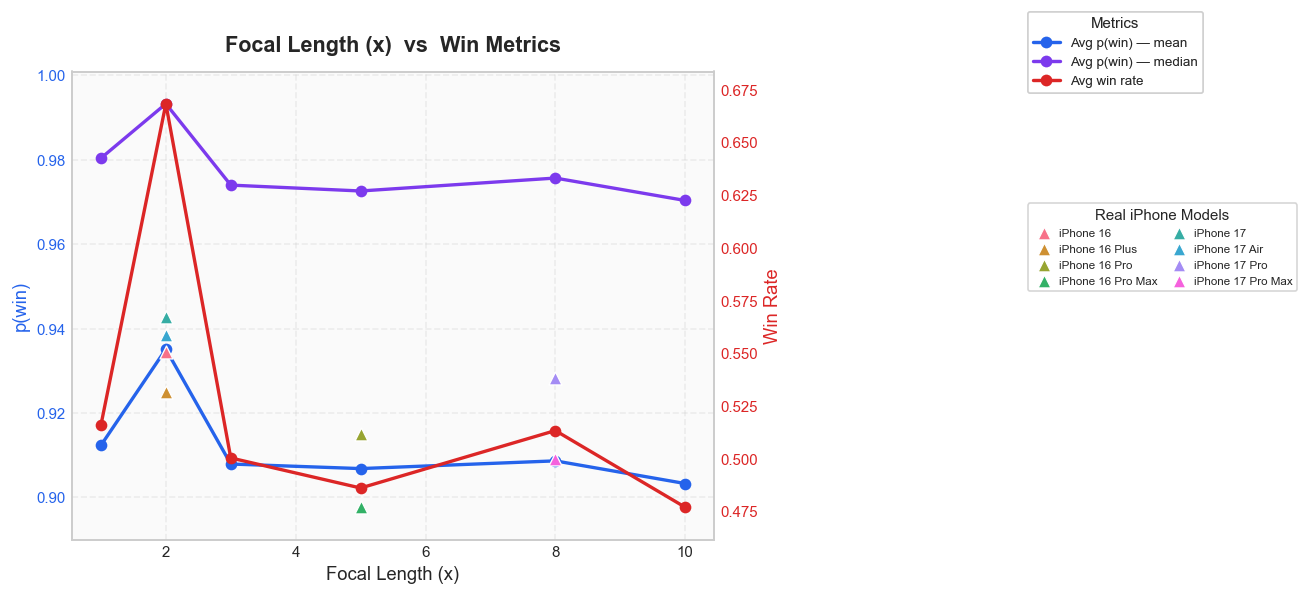

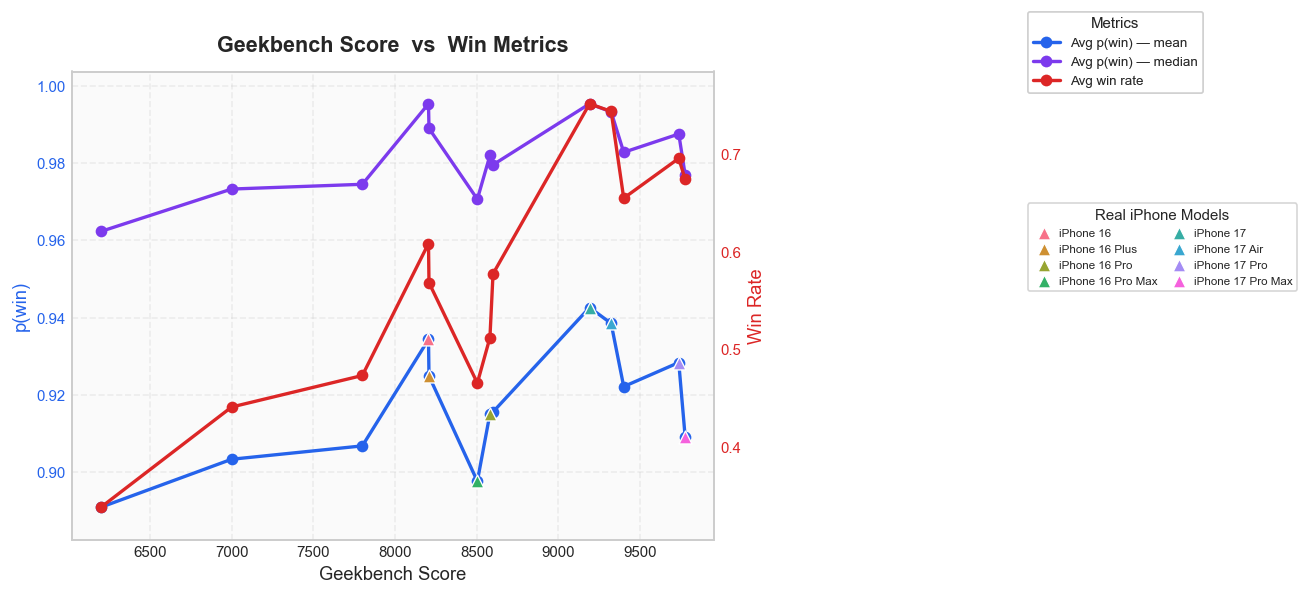

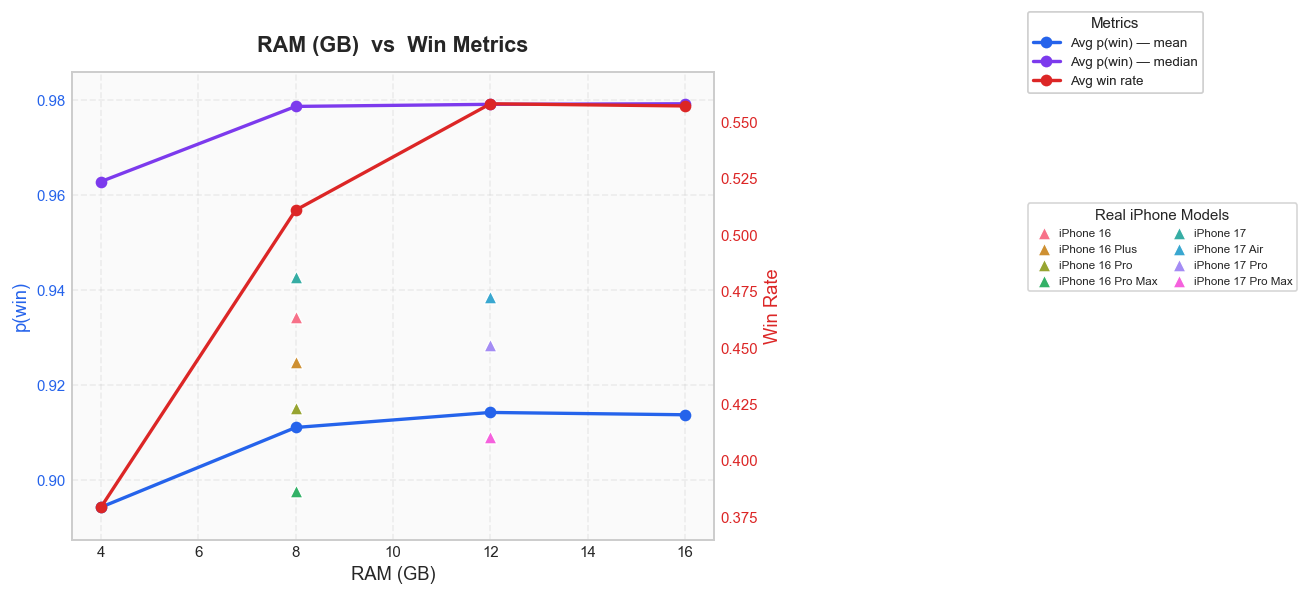

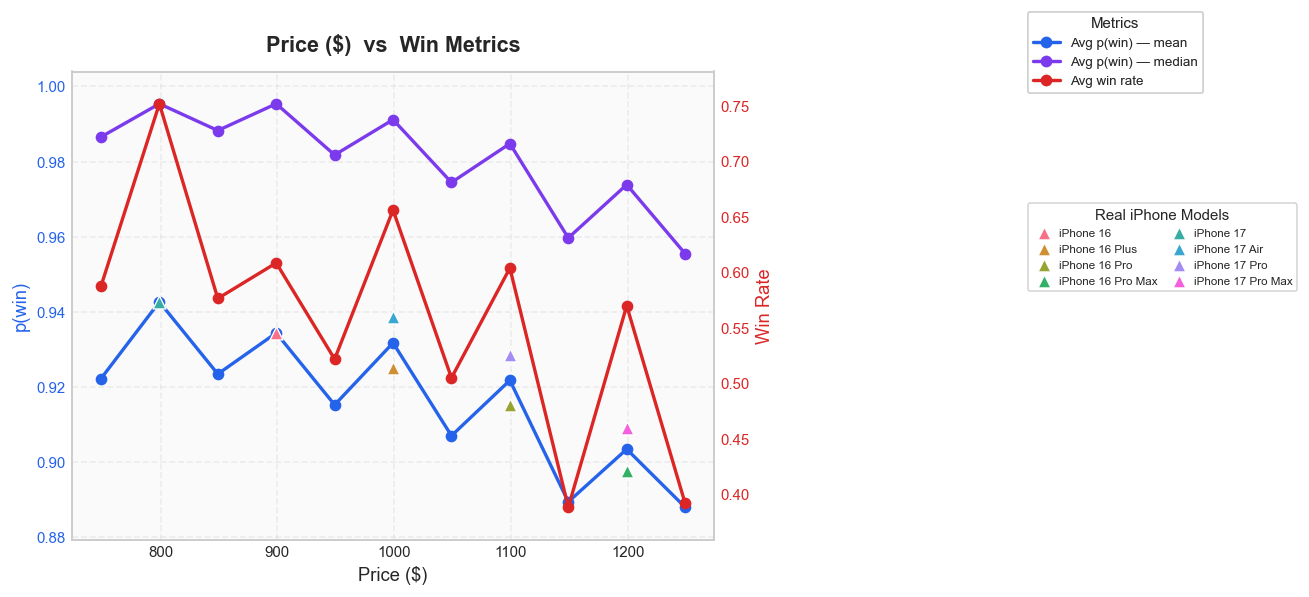

In [60]:
num_cols = [
    "battery_life",
    "screen_size",
    "thickness",
    "front_camera",
    "rear_camera",
    "focal_length",
    "geekbench",
    "ram",
    "price",
]

# Pretty attribute labels
col_labels = {
    "battery_life": "Battery Life (hrs)",
    "screen_size": "Screen Size (in)",
    "thickness": "Thickness (mm)",
    "front_camera": "Front Camera (MP)",
    "rear_camera": "Rear Camera (MP)",
    "focal_length": "Focal Length (x)",
    "geekbench": "Geekbench Score",
    "ram": "RAM (GB)",
    "price": "Price ($)",
}

real_ids = real_profiles["profile_id"].tolist()
real_plot = real_profiles.merge(summary_df, on="profile_id", how="left")
real_plot["profile_id"] = pd.Categorical(real_plot["profile_id"], categories=real_ids, ordered=True)
real_plot = real_plot.sort_values("profile_id")

# Refined palette for real profiles
palette = sns.color_palette("husl", n_colors=len(real_ids))
real_color = {pid: palette[i % len(palette)] for i, pid in enumerate(real_ids)}

# Style constants
LINE_COLORS = {"p_win_mean": "#2563EB", "p_win_median": "#7C3AED", "win_rate": "#DC2626"}
BG_COLOR = "#FAFAFA"


def plot_level_lines(col: str):
    tmp = data[[col, "win_rate", "p_win_mean", "p_win_median"]].dropna().copy()
    agg = (
        tmp.groupby(col)
        .agg(
            mean_win_rate=("win_rate", "mean"),
            mean_p_win=("p_win_mean", "mean"),
            mean_p_win_median=("p_win_median", "mean"),
            count=("p_win_mean", "count"),
        )
        .reset_index()
        .sort_values(col)
    )

    with plt.style.context("seaborn-v0_8-whitegrid"):
        fig, ax_left = plt.subplots(figsize=(9, 5), dpi=120)
        fig.patch.set_facecolor("white")
        ax_left.set_facecolor(BG_COLOR)
        ax_right = ax_left.twinx()
        ax_right.set_facecolor(BG_COLOR)

        # Left axis: p_win_mean & p_win_median (solid line, round markers)
        h1 = ax_left.plot(
            agg[col], agg["mean_p_win"],
            marker="o", markersize=6, linewidth=2, linestyle="-",
            label="Avg p(win) — mean", color=LINE_COLORS["p_win_mean"],
            zorder=4,
        )[0]

        h2 = ax_left.plot(
            agg[col], agg["mean_p_win_median"],
            marker="o", markersize=6, linewidth=2, linestyle="-",
            label="Avg p(win) — median", color=LINE_COLORS["p_win_median"],
            zorder=4,
        )[0]

        # Right axis: win_rate (solid line, round markers)
        h3 = ax_right.plot(
            agg[col], agg["mean_win_rate"],
            marker="o", markersize=6, linewidth=2, linestyle="-",
            label="Avg win rate", color=LINE_COLORS["win_rate"],
            zorder=4,
        )[0]

        # Real profiles as triangles
        scatter_handles = []
        scatter_labels = []
        rtmp = real_plot[["profile_id", col, "p_win_mean"]].dropna().copy()
        for _, row in rtmp.iterrows():
            pid = row["profile_id"]
            h = ax_left.scatter(
                row[col], row["p_win_mean"], s=60, marker="^",
                color=real_color[pid], edgecolors="white", linewidths=0.8,
                zorder=5,
            )
            scatter_handles.append(h)
            scatter_labels.append(str(pid))

        # Auto y-axis range — don't start from 0
        all_left_vals = list(agg["mean_p_win"]) + list(agg["mean_p_win_median"])
        if rtmp.shape[0] > 0:
            all_left_vals += list(rtmp["p_win_mean"])
        left_lo, left_hi = min(all_left_vals), max(all_left_vals)
        left_margin = (left_hi - left_lo) * 0.08
        ax_left.set_ylim(left_lo - left_margin, left_hi + left_margin)

        right_lo, right_hi = agg["mean_win_rate"].min(), agg["mean_win_rate"].max()
        right_margin = (right_hi - right_lo) * 0.08
        ax_right.set_ylim(right_lo - right_margin, right_hi + right_margin)

        # Labels & title
        xlabel = col_labels.get(col, col)
        ax_left.set_title(f"{xlabel}  vs  Win Metrics", fontsize=13, fontweight="bold", pad=12)
        ax_left.set_xlabel(xlabel, fontsize=11)
        ax_left.set_ylabel("p(win)", fontsize=11, color=LINE_COLORS["p_win_mean"])
        ax_right.set_ylabel("Win Rate", fontsize=11, color=LINE_COLORS["win_rate"])

        # Tick colors
        ax_left.tick_params(axis="y", colors=LINE_COLORS["p_win_mean"], labelsize=9)
        ax_right.tick_params(axis="y", colors=LINE_COLORS["win_rate"], labelsize=9)
        ax_left.tick_params(axis="x", labelsize=9)

        # Subtle grid only on left axis
        ax_left.grid(True, linestyle="--", alpha=0.3)
        ax_right.grid(False)

        # Legends outside — metrics on top-right, real profiles below
        n_real = len(scatter_handles)
        ncol_real = 2 if n_real > 4 else 1

        metric_legend = fig.legend(
            handles=[h1, h2, h3],
            labels=[h1.get_label(), h2.get_label(), h3.get_label()],
            title="Metrics", title_fontsize=9, fontsize=8,
            bbox_to_anchor=(1.01, 1.0), loc="upper left",
            borderaxespad=0.0, frameon=True, fancybox=True,
            edgecolor="#CCCCCC",
        )
        fig.legend(
            handles=scatter_handles, labels=scatter_labels,
            title="Real iPhone Models", title_fontsize=9, fontsize=7,
            bbox_to_anchor=(1.01, 0.68), loc="upper left",
            borderaxespad=0.0, frameon=True, fancybox=True,
            edgecolor="#CCCCCC", ncol=ncol_real,
            columnspacing=0.8, handletextpad=0.3,
        )
        fig.add_artist(metric_legend)

        fig.subplots_adjust(right=0.72, bottom=0.12, top=0.90)
        plt.show()


for col in num_cols:
    plot_level_lines(col)